1. подобрать 2 изображения (пара темное/светлое или пара много деталей/мало деталей)
2. Перевести изображения в черно-белое
3. Преобразовать изображения в негатив
4. Провести логарифмическое преобразование
5. Провести степенное преобразование с γ>1, γ<1
6. Провести кусочно-линейное преобразование
7. Провести вырезание уровней в изображении (для одного
изображения)

============================================

In [ ]:
from skimage import color, data, io
from matplotlib import pyplot as plt

In [ ]:
def print_pic(pic):
  io.imshow(pic)
  plt.show()

In [ ]:
def load_info_about_pic(pic):
  print("m x n =", len(pic), "x" ,len(pic[0]))
  

load_info_about_pic(color.rgb2gray(data.coffee()))


m x n = 400 x 600


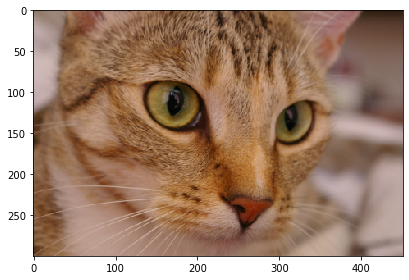

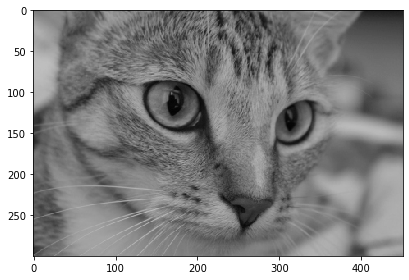

m x n = 300 x 451


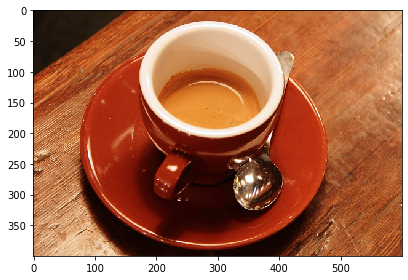

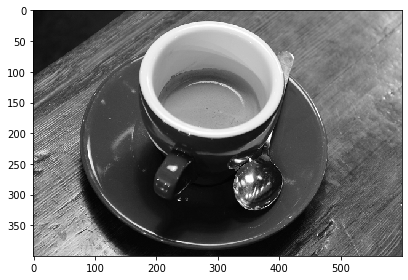

m x n = 400 x 600


In [ ]:
# подгрузка картинок по тематике дом из библиотеки
print_pic(data.chelsea())
pic_high_detail = color.rgb2gray(data.chelsea())
print_pic(pic_high_detail)
load_info_about_pic(pic_high_detail)

print_pic(data.coffee())
pic_low_detail = color.rgb2gray(data.coffee())
print_pic(pic_low_detail)
load_info_about_pic(pic_low_detail)


In [ ]:
from skimage.util import img_as_ubyte

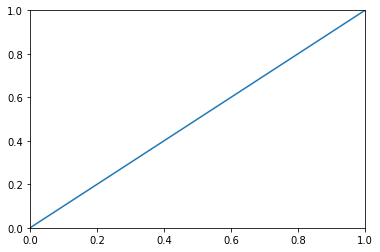

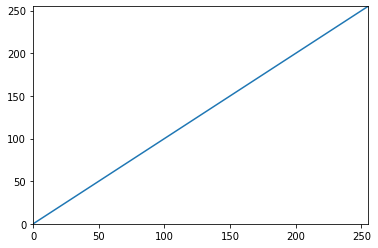

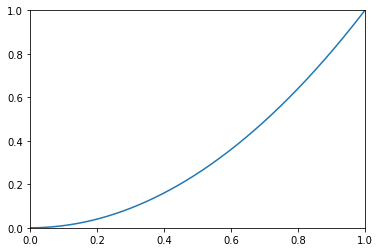

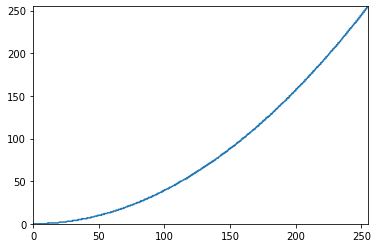

In [ ]:
def dummy_func_f(val):
  return val
def dummy_func_pow2(val):
  return val*val

def setup_plt_hyperparam(max_val=255):
  axes = plt.gca()
  axes.set_xlim([0,max_val])
  axes.set_ylim([0,max_val])


def print_plot(shader_func):
  # работа в функции идет со значениями от 0 до 1
  # bruh
  max_len = 1000

  tmp_range = [(1/max_len) * i for i in range(0, max_len)] # создание массива значений от 0 до 1 с шагом 1/max_len
  tmp = [0]*max_len # обявление выходного массива нужной длины

  for i in range(len(tmp_range)): # применение "шейдера"
    tmp[i] = shader_func(tmp_range[i])

  setup_plt_hyperparam(1)
  plt.plot(tmp_range, tmp) # 0 1 (более точно отображает применяемую функцию)
  plt.show()

  setup_plt_hyperparam()
  plt.plot(img_as_ubyte(tmp_range), img_as_ubyte(tmp)) # 0 255
  plt.show()


print_plot(dummy_func_f)
print_plot(dummy_func_pow2)

In [ ]:
def change_pic(pic, shader_func):
  tmp = pic.copy()
  for i in range(len(pic)):
    for j in range(len(pic[i])):
      tmp[i][j] = shader_func(pic[i][j])
  print_pic(tmp)
  print_plot(shader_func)
  return tmp

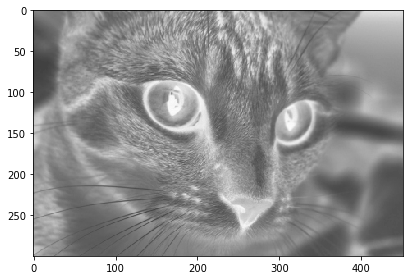

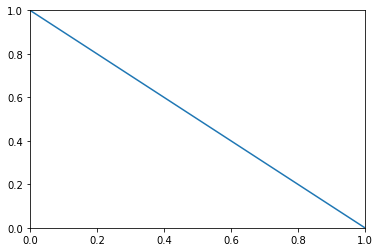

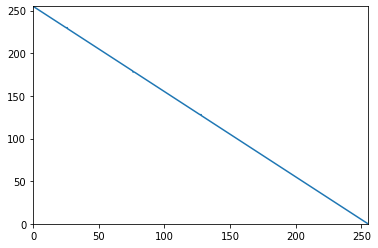

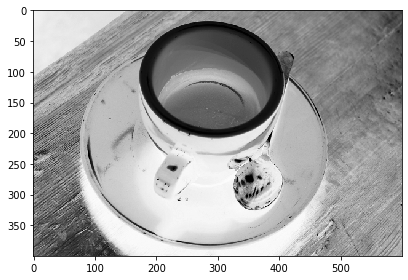

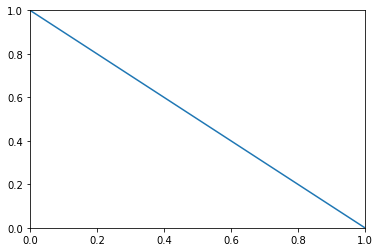

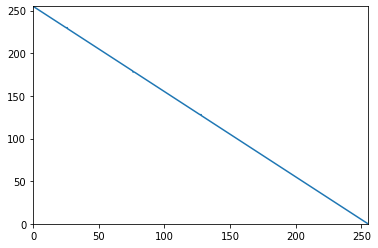

In [ ]:
# f(-1)

def reversed_func(val):
  return 1-val

pic_high_detail_rev = change_pic(pic_high_detail, reversed_func)
pic_low_detail_rev = change_pic(pic_low_detail, reversed_func)

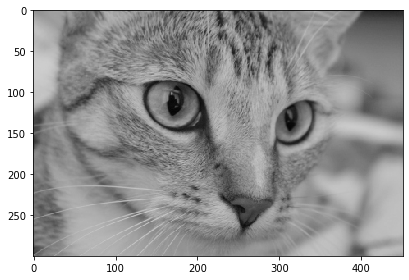

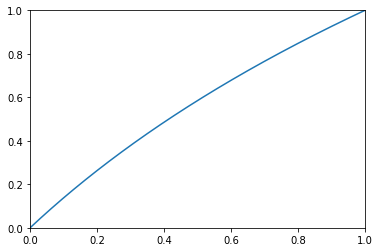

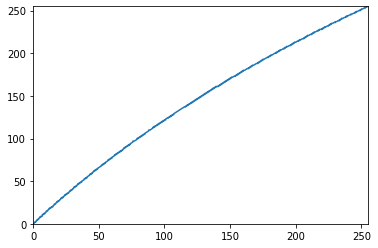

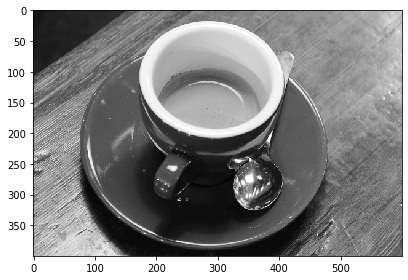

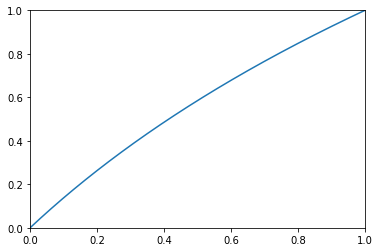

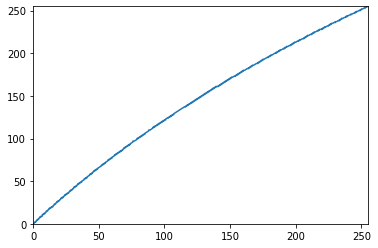

In [ ]:
# log(x)
import math

def log_func(val): 
  return math.log10(val+1)/math.log10(1+1) # bruh

pic_high_detail_log = change_pic(pic_high_detail, log_func)
pic_low_detail_log = change_pic(pic_low_detail, log_func)

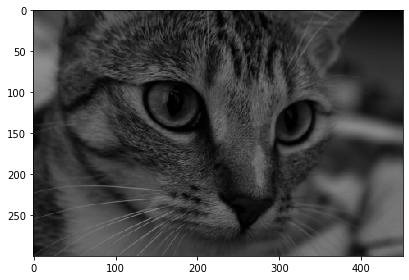

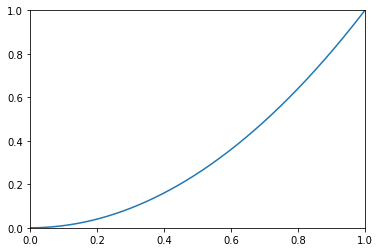

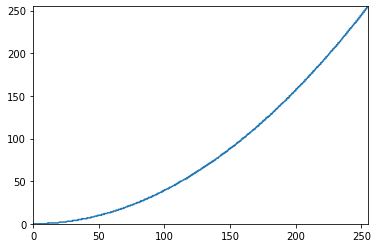

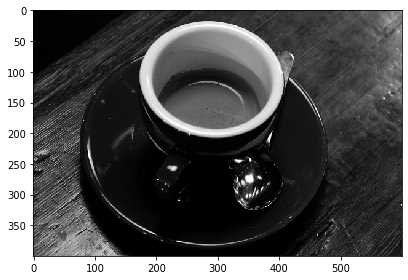

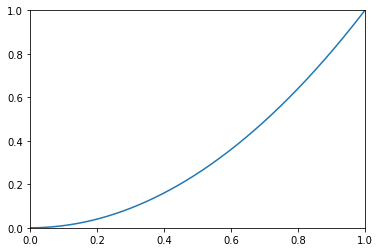

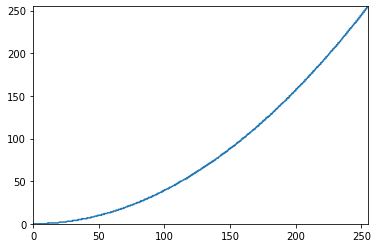

In [ ]:
# pow2(x)
import math

def pow2_func(val):
  return math.pow(val, 2)

pic_high_detail_log = change_pic(pic_high_detail, pow2_func)
pic_low_detail_log = change_pic(pic_low_detail, pow2_func)

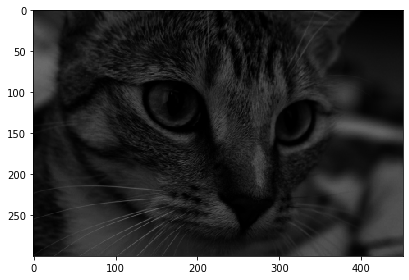

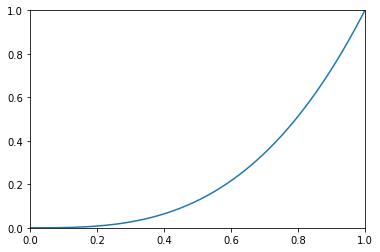

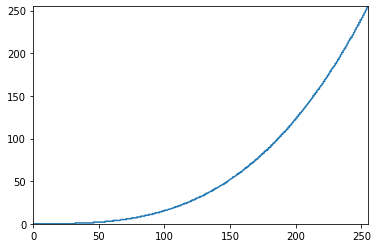

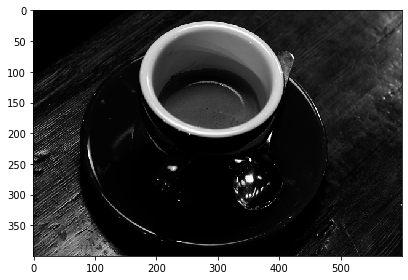

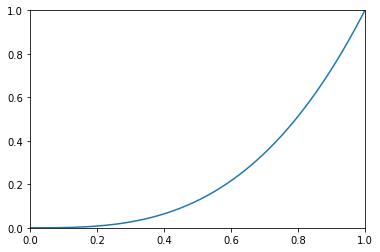

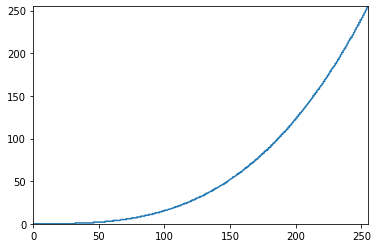

In [ ]:
# pow3(x)
import math

def pow3_func(val):
  return math.pow(val, 3)

pic_high_detail_log = change_pic(pic_high_detail, pow3_func)
pic_low_detail_log = change_pic(pic_low_detail, pow3_func)

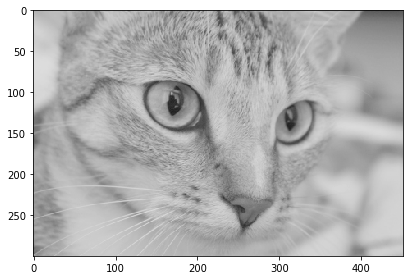

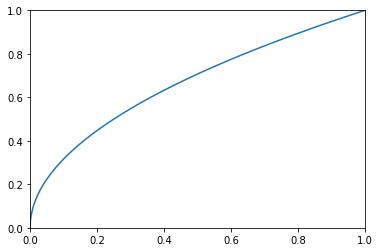

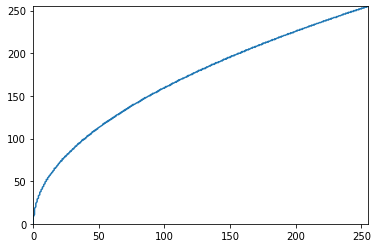

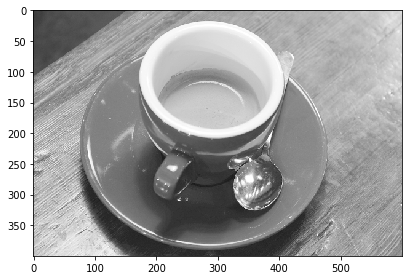

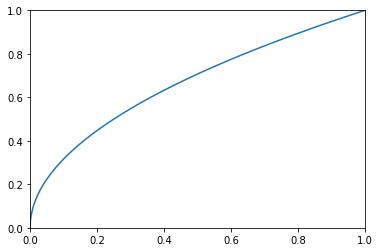

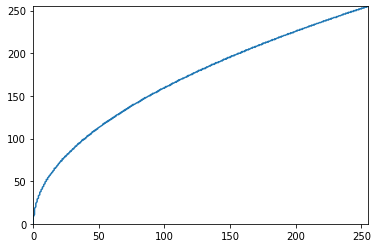

In [ ]:
# pow1/2(x)
import math

def pow1_2_func(val):
  return math.pow(val, 1/2)

pic_high_detail_log = change_pic(pic_high_detail, pow1_2_func)
pic_low_detail_log = change_pic(pic_low_detail, pow1_2_func)

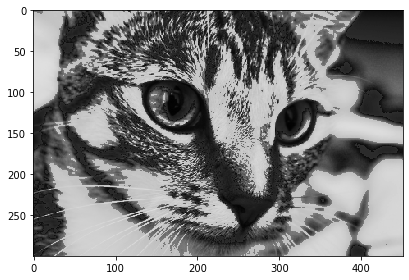

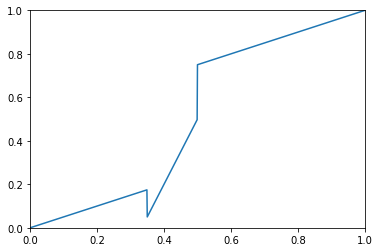

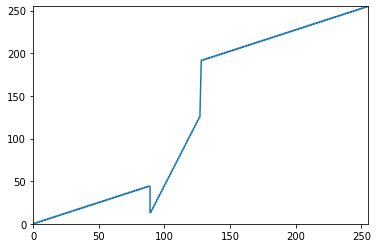

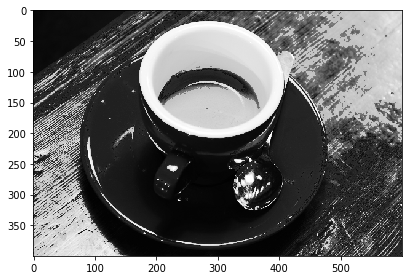

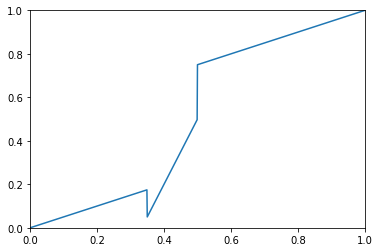

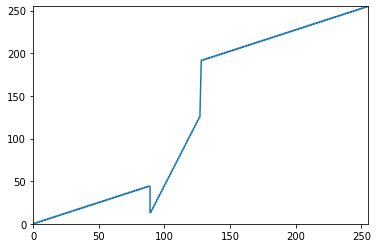

In [ ]:
# stepped func
import math

def stepped_func_hardcoded(val): # bruh (коэффициенты методом подбора)
  mid_section_left = .35
  mid_section_right = .5
  if(val<=mid_section_left):
    return val/2
  if(val>=mid_section_right):
    return val/2+.5
  return val*3-1


pic_high_detail_log = change_pic(pic_high_detail, stepped_func_hardcoded)
pic_low_detail_log = change_pic(pic_low_detail, stepped_func_hardcoded)

In [ ]:
# вырезание уровней
import numpy as np
max_colors = 255

def pic_level_knife(pic):
  ret = [np.uint8(np.absolute([[0 for j in range(len(pic[0]))] for i in range(len(pic))])) for i in range(max_colors)]
  gistogram_data = [0] * max_colors
  for i in range(len(pic)):
    for j in range(len(pic[i])):
      color_cur = math.floor(max_colors*pic[i][j]) # идет округление при переводе из 0..1 в 0..255, мб есть способ сделать без необходимости округления 
      #color_cur = pic[i][j]*1000
      #print(ret[color_cur][0][0]) = 1
      ret[color_cur][i][j] = 1
      gistogram_data[color_cur] +=1
  return ret, gistogram_data

def pic_normalize_level_knife(pic):
  tmp_pic = img_as_ubyte(pic) # перевод из бинарного представления в 0 255

  ret = [np.uint8(np.absolute([[0 for j in range(len(tmp_pic[0]))] for i in range(len(tmp_pic))])) for i in range(max_colors)]
  gistogram_data = [0] * max_colors
  tmp_data = [[i, 0] for i in range(max_colors)] # TODO убрать
  for i in range(len(tmp_pic)):
    for j in range(len(tmp_pic[i])):
      color_cur = tmp_pic[i][j] 
      ret[color_cur][i][j] = 1

      gistogram_data[color_cur] +=1
      tmp_data[color_cur][1] +=1  # TODO убрать
  return ret, gistogram_data, tmp_data

#pic_levels, gistogram_data = pic_level_knife(pic_high_detail)
pic_levels, gistogram_data, tmp_data = pic_normalize_level_knife(pic_high_detail)


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


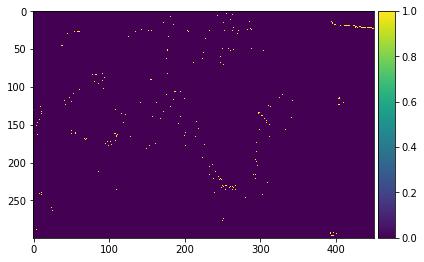

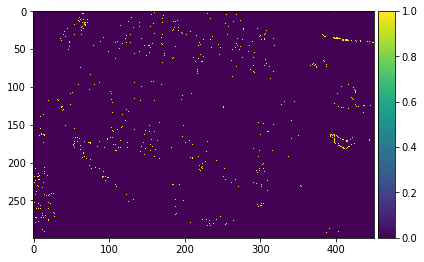

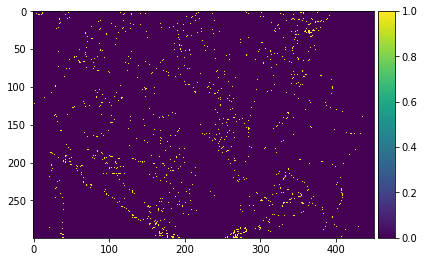

In [ ]:
# просмотр отдельных срезов
print_pic(pic_levels[69])
print_pic(pic_levels[89])
print_pic(pic_levels[128])

[[0, 0], [1, 0], [2, 0], [3, 0], [4, 3], [5, 26], [6, 42], [7, 60], [8, 51], [9, 60], [10, 43], [11, 35], [12, 42], [13, 46], [14, 40], [15, 50], [16, 42], [17, 46], [18, 51], [19, 51], [20, 70], [21, 77], [22, 112], [23, 114], [24, 101], [25, 90], [26, 118], [27, 106], [28, 92], [29, 99], [30, 114], [31, 124], [32, 118], [33, 138], [34, 122], [35, 123], [36, 111], [37, 124], [38, 97], [39, 144], [40, 131], [41, 118], [42, 131], [43, 153], [44, 169], [45, 168], [46, 171], [47, 171], [48, 197], [49, 173], [50, 188], [51, 195], [52, 278], [53, 228], [54, 217], [55, 257], [56, 247], [57, 281], [58, 274], [59, 274], [60, 278], [61, 282], [62, 297], [63, 316], [64, 305], [65, 345], [66, 354], [67, 393], [68, 385], [69, 398], [70, 471], [71, 462], [72, 463], [73, 450], [74, 484], [75, 582], [76, 562], [77, 584], [78, 662], [79, 654], [80, 682], [81, 672], [82, 674], [83, 778], [84, 767], [85, 807], [86, 819], [87, 914], [88, 982], [89, 1013], [90, 1038], [91, 1041], [92, 1037], [93, 1118], [

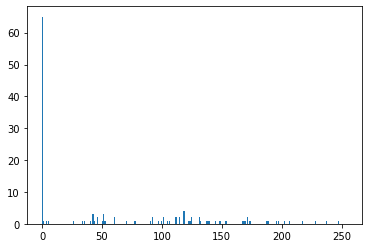

In [ ]:
# просмотр гистограммы распределения
print(tmp_data)
plt.hist(gistogram_data,range(len(gistogram_data)))
plt.show()